In [2]:
from astropy.io import fits
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import vq, kmeans
import scipy
from astroquery.gaia import Gaia
import os

import match

In [1]:
from astropy.io import fits
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import vq, kmeans
import scipy
import os
import h5py as h5

import match

In [2]:
# Choose a band for the clustering to be based on - 'g', 'r', 'i', 'z', 'y'
BAND = 'i'

PSF_DATA_FILEPATH = "../../psf_data/kids_allfields.fits"
RESULTS_FILEPATH = "../results/"
CLUSTER_SUBSAMPLE_SIZE = 10000
NUMBER_OF_CLUSTERS = 40
INT_DATA_PATH = "../../int_data/"

In [3]:
def read_kids_fits(file_path, n = int(1e6)):
    """
    Read a kids file and return the data as a pandas dataframe.
    Args:
        file_path: path to the hfits5 file
    Returns:
        data: pandas dataframe with the data from the fits file
    """
    kids_tab = fits.open(PSF_DATA_FILEPATH)[2].data
    idx = np.random.choice(np.arange(len(kids_tab)), size = n, replace = False)
    mag_r = np.array(kids_tab['STAR_MAG'])[idx]
    ra = np.array(kids_tab['ALPHA_J2000'])[idx]
    dec = np.array(kids_tab['DELTA_J2000'])[idx]
    data = {'ra': ra, 'dec': dec, 'mag': mag_r}
    data['coord'] = SkyCoord(ra=data['ra'], dec=data['dec'], unit = 'deg')
    kids_data = pd.DataFrame(data)
    
    return kids_data

In [5]:
kids_datatab = read_kids_fits(PSF_DATA_FILEPATH, n = int(1e6))

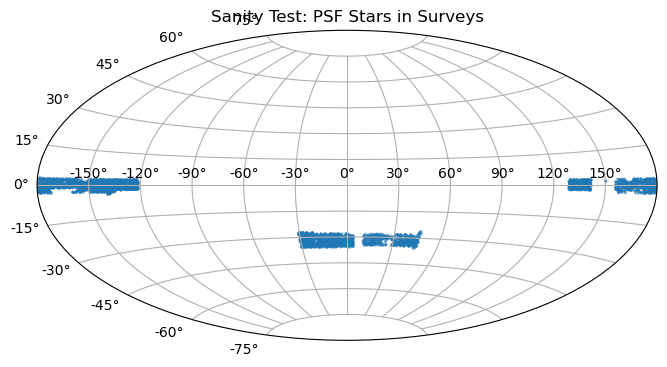

In [6]:
match.plot_sanity_test(kids_datatab['coord'], ".", BAND)

In [57]:
def read_kids_fits(file_path, n = int(1e6)):
    """
    Read a kids file and return the data as a pandas dataframe.
    Args:
        file_path: path to the hfits5 file
    Returns:
        data: pandas dataframe with the data from the fits file
    """
    kids_tab = fits.open(PSF_DATA_FILEPATH)[2].data
    idx = np.random.choice(np.arange(len(kids_tab)), size = n, replace = False)
    mag_r = np.array(kids_tab['STAR_MAG'])[idx]
    ra = np.array(kids_tab['ALPHA_J2000'])[idx]
    dec = np.array(kids_tab['DELTA_J2000'])[idx]
    data = {'ra': ra, 'dec': dec, 'mag': mag_r}
    data['coord'] = SkyCoord(ra=data['ra'], dec=data['dec'], unit = 'deg')
    kids_data = pd.DataFrame(data)
    
    return kids_data

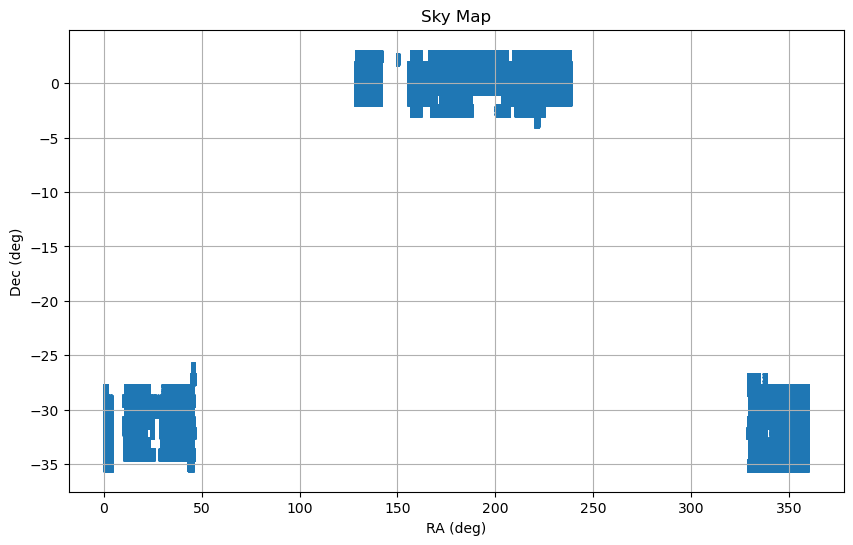

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(data['coord'].ra, data['coord'].dec, s=1)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_title('Sky Map')
ax.grid(True)
plt.show()

In [49]:
# Choose a band for the clustering to be based on - 'g', 'r', 'i', 'z', 'y'
BAND = 'i'

PSF_DATA_FILEPATH = "../../psf_data/hscy3_allfields.h5"
RESULTS_FILEPATH = "../results/"
CLUSTER_SUBSAMPLE_SIZE = 10000
NUMBER_OF_CLUSTERS = 40
INT_DATA_PATH = "../../int_data/"

In [50]:
def read_hscy3_h5(file_path, n = int(1e6)):
    """
    Read an h5 file and return the data as a pandas dataframe.
    Args:
        file_path: path to the h5 file
    Returns:
        data: pandas dataframe with the data from the h5 file
    """
    with h5.File(file_path, 'r') as f:
        # Read specific fields
        idx = np.random.choice(np.arange(len(f['stars/mag_i'])), size = n, replace = False)
        mag_i = np.array(f['stars/mag_i'])[idx]
        ra = np.array(f['stars/ra'])[idx]
        dec = np.array(f['stars/dec'])[idx]
        data = {'ra': ra, 'dec': dec, 'mag': mag_i}
        data['coord'] = SkyCoord(ra=data['ra'], dec=data['dec'], unit = 'deg')
    
    return pd.DataFrame(data)

In [52]:
hsc_datatab = read_hscy3_h5(PSF_DATA_FILEPATH)

In [53]:
hsc_datatab['ra']

0         178.148578
1         333.598313
2         160.747633
3         183.886455
4         342.612594
             ...    
999995    136.516939
999996    184.006413
999997    332.939098
999998    237.352527
999999    152.550109
Name: ra, Length: 1000000, dtype: float64